<a href="https://colab.research.google.com/github/clarawajdenbaum/Project-2/blob/main/Project_2_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [23]:
df = pd.read_csv('/content/drive/MyDrive/Project 2/docs/archive.zip')
corr = df.corr()
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Preparing and Cleaning the Data

In [24]:
df.shape # This set of data contains 5110 rows and 12 columns.

(5110, 12)

In [25]:
df.duplicated().sum()

0

In [26]:
df.drop("id", axis=1, inplace=True) # This column is not interesting for our analysis so I am removing it.

In [27]:
df.isna().sum()   # The 'bmi' column contains missing data.

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [28]:
df.dropna(subset=['bmi'], inplace=True) # I remove the rows with missing values as it is only 3% of our data.
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [29]:
df.shape  # The shape of our data after cleaning is 4909 rows and 11 columns.

(4909, 11)

In [30]:
# Let's check for inconsistencies in our data

print('Columns Types:')
print(df.dtypes)
print('\n')
print('Value Counts:')
print(df.value_counts())

# There are no inconsistencies in our data

Columns Types:
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


Value Counts:
gender  age    hypertension  heart_disease  ever_married  work_type      Residence_type  avg_glucose_level  bmi   smoking_status   stroke
Female  0.08   0             0              No            children       Urban           139.67             14.1  Unknown          0         1
Male    15.00  0             0              No            children       Rural           62.57              32.3  never smoked     0         1
                                                                         Urban           113.28             23.7  never smoked     0         1
                                                                     

In [31]:
# Identifying target vector and features

y = df['stroke']  # Target vector 
X = df.drop(columns='stroke')   # Features matrix

# Exploratory Visualizations

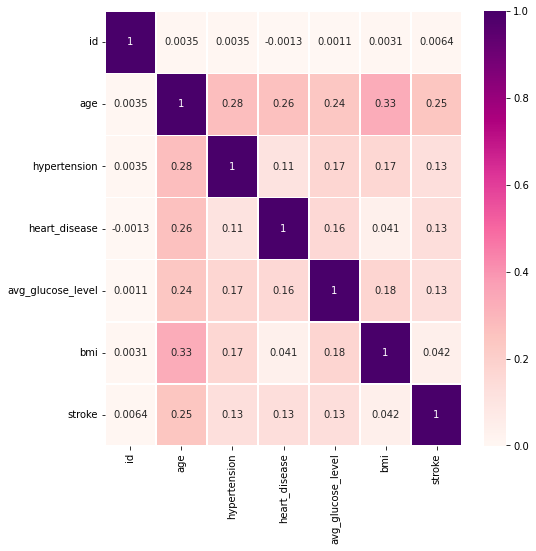

In [ ]:
plt.figure(figsize=(8,8));
sns.heatmap(corr, cmap = 'RdPu', annot = True, linewidths=.5);

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


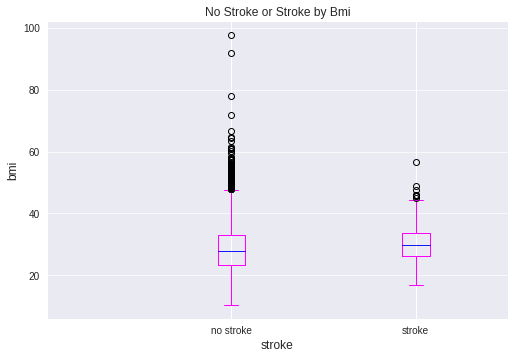

In [40]:
plt.style.use('seaborn');
df.boxplot(column = 'bmi', by = 'stroke', color='magenta', medianprops=dict(color="blue", alpha=0.9));
plt.ylabel('bmi', fontsize = 12);
plt.xlabel('stroke', fontsize = 12);
plt.title('No Stroke or Stroke by Bmi');
plt.suptitle('');
plt.grid(axis='y', c='w', alpha=0.7, linestyle='-');
plt.xticks([0, 1, 2], ['', 'no stroke', 'stroke']);